<a href="https://colab.research.google.com/github/Shubhangani-Tiwari/Book_Recommendation_System_Unsupervised_Learning_Project/blob/main/Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Book Recommendation System** 



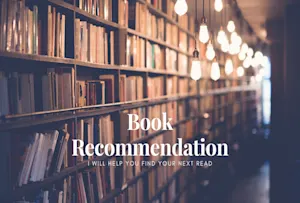

**Project Type** - Unsupervised Machine Learning

**Contribution** - Individual

**Name** - Shubhangani Tiwari

# **Project Summary -**

This project is all about recomendation system. In this project we have tried to use some approches for recomending the books to the readers or users. We have used various ways such as collaborative Filtering and Content based Filtering for recomendation of the books to the users.

**ABOUT THE DATASET** : We have three different datasets namely book.csv which contains information about the books such as book-author, publisher, book title, year of publication, image links and unique Book ID i.e., ISBN Number. Then we have ratings.csv which contain information about ratings given by the users for the books, it contains user ID ,ISBN number and book rating (scale between 1-10). Then we have users.csv which contain information about users such as their location , age and their user ID.

**EDA** : For the EDA part we have analysed about the top Books rated by the users, top authors who got most ratings, top authors on the basis of number of books, Top publishers who have published maximum number of books, we have analysed the users age and lastly we have analysed their ratings we got that most of the users have rated 8.

**Recomendation Approaches** :

1) Collaborative Filtering:

In Collaborative Filtering, we make predictions of the taste or the interests of the user based on the other similar users behaviour (which is called collaborative) .The simple understanding is that if a person P1 have similar opinion with person P2 , then if person P1 is reading Harry Potter books then person P2 may also read Harry Potter books.

Collaborative Filtering has mainly two implimentaion strategies:

* Model Based
* Memory Based


**User_based Collaborative Filtering**

In this technique we try to predict on basis of what user may like based on the ratings that they had given to the items. In simpe words here we try to identify the neighbouring users on the basis of similarity of active users and then scoring of the items is calculated on the basis of those neighbour users

**Item_based Collaborative Filtering**

In Item based collaborative filtering we try to find similar items based on the items whichs user has liked or interacted with .It suggests an item based on items the user has previously consumed. It looks for the items the user has consumed then it finds other items similar to consumed items and recommends accordingly.

**Model based**

* Singular value decomposition(SVD):

It is a popular method in field of Data Science and Machine Learning .It is a classical method from the Linear Algebra concept. It is popular beacuse of its properties and its use in Recomendation System. We can use this in recomending Books, movies etc.

SVD is a method from linear algebra that has been generally used as a dimensionality reduction technique in ML problems. It is amtrix Factorisation technique which tries to reduce the number of feature or attributes by reducing the sapce dimension from N dimension to I dimension. SVD is used as a collaborative filtering technique in recomendation technique domain. It consist of a matrix structure where the rows define the users and columns defines the item.

* Non-Negative Matrix Factorisation(NMF):

Our goal in NMF is to approximate the users-item V matrix by the dot product of two arrays W and H. Dimensions of the arrays are defined by dimensions of V and number of components we set to the algorithm. If V has n rows and m columns and we want to decompose it to k components, then W has n rows, and k columns and H has k rows and m columns.This is actually matrix factorization part of the algorithm. The Non-negative part refers to V, W, and H — all the values have to be equal or greater than zero, i.e., non-negative.

**2) Content based Filtering :**

It is type of recomendation system which depends upon the data which we get from the customers, based on the data a user profile is generated.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval

# Sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
raw_books = pd.read_csv('/content/drive/MyDrive/Books.csv')
raw_users = pd.read_csv('/content/drive/MyDrive/Users.csv')
raw_ratings = pd.read_csv('/content/drive/MyDrive/Ratings.csv')

### Dataset Rows & Columns count

Book Dataset

Dataset First View

In [4]:
#first 5 rows
raw_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
#last 5 rows
raw_books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
# Dataset Rows & Columns count
print(f"There are {raw_books.shape[0]} rows and {raw_books.shape[1]} columns in Book Dataset ")

There are 271360 rows and 8 columns in Book Dataset 


### Dataset Information

In [7]:
# Dataset Info
raw_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f"There are {len(raw_books[raw_books.duplicated()])} duplicates in the book dataset")

There are 0 duplicates in the book dataset


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
raw_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

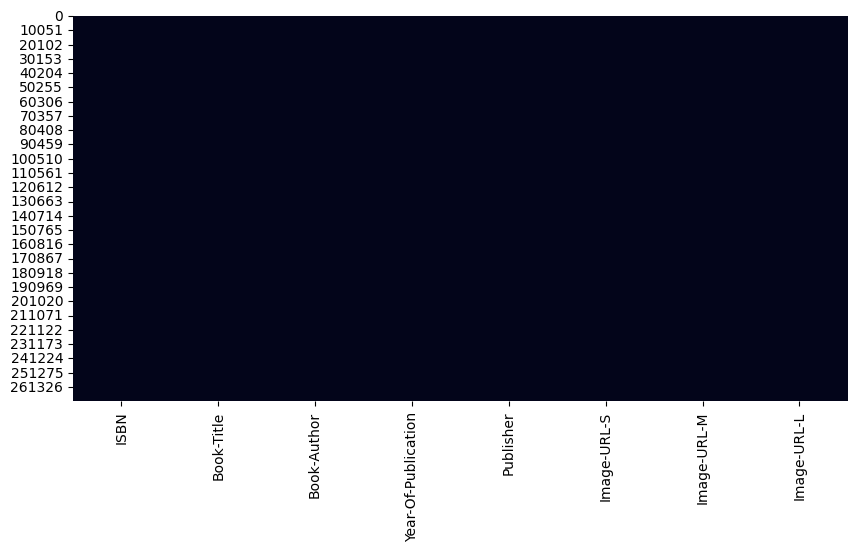

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,5))

sns.heatmap(raw_books.isnull(), cbar=False)
plt.show()

User Dataset

Dataset First View

In [11]:
#first 5 rows
raw_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
raw_users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


Dataset Rows & Columns count

In [13]:
print(f"There are {raw_users.shape[0]} rows and {raw_users.shape[1]} columns in user dataset")

There are 278858 rows and 3 columns in user dataset


Dataset Information

In [14]:
raw_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
#Duplicate Values
print(f"There are {len(raw_users[raw_users.duplicated()])} duplicates in the user dataset")

There are 0 duplicates in the user dataset


Missing Values/Null Values

In [16]:
raw_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: >

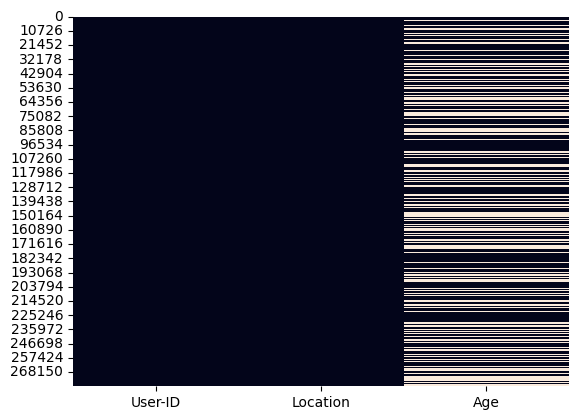

In [17]:
# Visualizing the missing values
sns.heatmap(raw_users.isnull(), cbar=False)

Rating Dataset

Dataset First View

In [18]:
#first 5 rows
raw_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
#last 5 rows
raw_ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


Dataset Rows & Columns count

In [20]:
print(f"There are {raw_ratings.shape[0]} rows and {raw_ratings.shape[1]} columns in rating dataset")

There are 1149780 rows and 3 columns in rating dataset


Dataset Information

In [21]:
raw_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Duplicate Values

In [22]:
print(f"There are {len(raw_ratings[raw_ratings.duplicated()])} duplicates in the rating dataset")

There are 0 duplicates in the rating dataset


Missing Values/Null Values

In [23]:
raw_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### What did you know about your dataset?

I got to know the following things about the datasets:

1) Number of rows and columns:

* In Book dataset, There are 271360 rows and 8 columns,
* In User dataset, There are 278858 rows and 3 columns
* In Rating dataset, There are 1149780 rows and 3 columns
2) Information about the Datatype of each column in each dataset.

3) Null values:

* In Book dataset, There are negligible null values in three features named as Book-Author, Publisher and Image-URL-L.
* In User dataset, There are significant null values in one features that is,Age,
* In Rating dataset, There are no null values present

4) There are no duplicate values found in any dataset.

## ***2. Understanding Your Variables***

Book dataset

In [24]:

# book Dataset Columns
raw_books.columns.values

array(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype=object)

In [25]:
# book Dataset Describe
raw_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


Since all the features have object datatype, hence it gives us categorical description.

User dataset

In [26]:
# User dataset Columns
raw_users.columns.values

array(['User-ID', 'Location', 'Age'], dtype=object)

In [27]:
# User dataset numerical Description
raw_users.describe() 

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [28]:
#User dataset categorical description
raw_users.describe(include="object")

,Location
count,278858
unique,57339
top,"london, england, united kingdom"
freq,2506


Rating dataset

In [29]:
#Rating Dataset Columns
raw_ratings.columns.values

array(['User-ID', 'ISBN', 'Book-Rating'], dtype=object)

In [30]:
#Rating Dataset Numerical description
raw_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [31]:
raw_ratings.describe(include="object")

,ISBN
count,1149780
unique,340556
top,0971880107
freq,2502


# Dataset Description
---------------------
---------------------

**Book dataset**

This dataset contains the information regarding the books. Books are identified by their respective ISBN. 

**Columns present in the dataset:**

* ISBN: Unique ID to identify a book

* Book-Title: Title of the book

* Book-Author: Author of the book

* Year-Of-Publication: The year in which the book was published

* Publisher: Publisher of the book

* Image-URL-S: Image URL of the book (Small Size)

* Image-URL-M: Image URL of the book (Medium Size)

* Image-URL-L: Image URL of the book (Large Size)



Check Unique Values for each variable.

In [32]:
# Check Unique Values for each variable.
for i in raw_books.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, raw_books[i].nunique()))

No. of unique values in 'ISBN' is 271360.
No. of unique values in 'Book-Title' is 242135.
No. of unique values in 'Book-Author' is 102023.
No. of unique values in 'Year-Of-Publication' is 202.
No. of unique values in 'Publisher' is 16807.
No. of unique values in 'Image-URL-S' is 271044.
No. of unique values in 'Image-URL-M' is 271044.
No. of unique values in 'Image-URL-L' is 271041.


----------------
----------------

User dataset

This dataset contains the information related to the users who read the books.

**Columns present in the dataset:**

* User-ID: Unique ID of the user

* Location: Location of the user

* Age: Age of the user

Check Unique Values for each variable.

In [33]:
# Check Unique Values for each variable.
for i in raw_users.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, raw_users[i].nunique()))

No. of unique values in 'User-ID' is 278858.
No. of unique values in 'Location' is 57339.
No. of unique values in 'Age' is 165.


Rating dataset

This dataset contains the book rating information.

Book-Ratings are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

Columns present in the dataset:

* User-ID: Unique ID of the user

* ISBN: Unique ID to identify a book

* Book-Rating: Ratings of the book (In the range of 0-10)

**Check Unique Values for each variable.**

In [34]:
# Check Unique Values for each variable.
for i in raw_ratings.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, raw_ratings[i].nunique()))

No. of unique values in 'User-ID' is 105283.
No. of unique values in 'ISBN' is 340556.
No. of unique values in 'Book-Rating' is 11.


-------------
-------------

## 3. ***Data Wrangling***

Book dataset

In [35]:
# Dropping the columns which are not required for the analysis
raw_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [36]:
# Renaming the columns for easiness
raw_books.rename(columns = {'Book-Title':'Title', 'Book-Author':'Author',
                           'Year-Of-Publication':'Publication Year'}, inplace=True)

In [37]:
# checking the unique values of year of publication
raw_books['Publication Year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

There are values such as 'DK Publishing Inc' and 'Gallimard' which are in text form

There are values such as 0 for the Publication Year column

In [38]:
# checking the data where the 'Publication Year' is 'DK Publishing Inc'
raw_books.loc[raw_books['Publication Year'] == 'DK Publishing Inc',:]

,ISBN,Title,Author,Publication Year,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


* We can notice that the Author, Publication Year, and Publisher columns are exchanged with each others and publication column contain image links

* we need to find the Author on our own for the book DK Readers: Creating the X-Men, How It All Beg.. and DK Readers: Creating the X-Men, How Comic Book..

In [39]:
#Fixing the wrongly inputed values 
#ISBN '0789466953'
raw_books.loc[raw_books.ISBN == '0789466953','Publication Year'] = 2000
raw_books.loc[raw_books.ISBN == '0789466953','Author'] = "James Buckley" # this we gathered from the google 
raw_books.loc[raw_books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
raw_books.loc[raw_books.ISBN == '0789466953','Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
raw_books.loc[raw_books.ISBN == '078946697X','Publication Year'] = 2000
raw_books.loc[raw_books.ISBN == '078946697X','Author'] = "Michael Teitelbaum" # this we gathered from the google
raw_books.loc[raw_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
raw_books.loc[raw_books.ISBN == '078946697X','Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [40]:
# checking for the Gallimard
raw_books.loc[raw_books['Publication Year'] == 'Gallimard',:]

,ISBN,Title,Author,Publication Year,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


* Here also we can see that Author, Publication Year and publishers values are interchanged and publishers actual name is missing.

In [41]:
raw_books.loc[raw_books.ISBN == '2070426769','Publication Year'] = 2003
raw_books.loc[raw_books.ISBN == '2070426769','Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
raw_books.loc[raw_books.ISBN == '2070426769','Publisher'] = "Gallimard"
raw_books.loc[raw_books.ISBN == '2070426769','Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [42]:
# Rechecking the correction made
raw_books['Publication Year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [43]:
raw_books['Publication Year'] = raw_books['Publication Year'].astype(int)
# Replacing invalid values such as year greater than 2022 and year having 0 with the NaN
# so that we can fill those null values with proper measure of central tendency

raw_books.loc[(raw_books['Publication Year'] > 2022) | (raw_books['Publication Year'] == 0),'Publication Year'] = np.NAN


In [44]:
raw_books.columns.values

array(['ISBN', 'Title', 'Author', 'Publication Year', 'Publisher'],
      dtype=object)

-----------------
-----------------

**User dataset**

In [45]:
# Renaming the columns
raw_users.rename(columns = {'User-ID':'user_id'}, inplace = True)

In [46]:
raw_users.columns

Index(['user_id', 'Location', 'Age'], dtype='object')

In [47]:
raw_users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [48]:
# Defining a function to get the country of the user from the location

def country(string):
  '''
  It returns the country from the location of the user
  '''
  country = string.rpartition(' ')[-1]
  if country=='zealand':
    return 'new zealand'
  elif country=='kingdom':
    return 'united kingdom'
    
  else:
    return country

In [49]:
# Creating a new column 'Country' to store country from the location

raw_users['Country'] = raw_users['Location'].apply(country)

In [50]:
raw_users.columns.values

array(['user_id', 'Location', 'Age', 'Country'], dtype=object)

In [51]:
raw_users["Country"]=raw_users["Country"].replace('[",,,.,-]','',regex=True)

In [52]:
raw_users["Country"].unique()

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', '', 'germany', 'mexico', 'china', 'italy',
       'federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', 'herzegovina', 'vietnam', 'lanka', 'pakistan', 'denmark',
       'belgium', 'malaysia', 'uae', 'turkey', 'philippines', 'greece',
       'colombia', 'norway', 'kuwait', 'chile', 'quit', 'lj', 'taiwan',
       'españa', 'jlk', 'sweden', 'n/a', 'argentina', 'nigeria', 'london',
       'bulgaria', 'austria', 'romania', 'singapore', 'california',
       'albania', 'egypt', 'tunisia', 'uzbekistan', 'qatar', 'syria',
       'arabia', 'indonesia', 'nebr', 'sudan', 'space', 'poland',
       'thailand', 'ireland', 'venezuela', 'paraguay', 'mozambique',
       'morocco', 'afghanistan', 'estonia', 'clackamas', '\\n/a\\',
       'castillaleón', 'lesotho', 'texas', 'yugoslavia', 'slovakia',
       'caracas

In [53]:
raw_users["Country"]=raw_users["Country"].replace('[",,,.,-]','',regex=True)

In [54]:
raw_users["Country"].value_counts().head(10)

usa               139717
canada             21662
united kingdom     18539
germany            17075
spain              13262
australia          11793
italy              11276
france              3526
portugal            3391
new zealand         3097
Name: Country, dtype: int64

-----------------
-----------------

**Rating dataset**

In [55]:
# Renaming the columns
raw_ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'Rating'}, inplace = True)

In [56]:
raw_ratings.columns.values

array(['user_id', 'ISBN', 'Rating'], dtype=object)

--------------
--------------

**Merge dataset**

In [57]:
# Creating a dataframe by merging books and ratings dataframe

books_ratings_df = raw_books.merge(raw_ratings, on='ISBN')

In [58]:
print(books_ratings_df.shape)
books_ratings_df.head()

(1031136, 7)


,ISBN,Title,Author,Publication Year,Publisher,user_id,Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,41385,0


# Top 10 most popular books on the basis of rating

In [59]:

# Groupby on book title by counting the number of ratings
num_rating_book_df = books_ratings_df.groupby('Title')['Rating'].count().reset_index()
# Renaming the column of the dataframe
num_rating_book_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_book_df.head()



,Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [60]:
# Groupby on book title by taking the ratings average
avg_rating_book_df = books_ratings_df.groupby('Title')['Rating'].mean().reset_index()

# Renaming the column of the dataframe
avg_rating_book_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_book_df.head()

,Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [61]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_books_df = num_rating_book_df.merge(avg_rating_book_df, on='Title')

# Printing the first 5 rows of the dataframe
popular_books_df.head()

,Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [62]:
# Selecting the books which have received ratings 200 and above and arranging the average ratings in descending order
popular_books_df = popular_books_df[popular_books_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular books on the basis of ratings
popular_books_df

,Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60582,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


In [63]:
# Getting all the details of the top 10 most popular books

popular_books_df.merge(raw_books, on='Title').drop_duplicates('Title')

,Title,num_ratings,avg_ratings,ISBN,Author,Publication Year,Publisher
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999.0,Scholastic
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000.0,Scholastic
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998.0,Scholastic
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003.0,Scholastic
13,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,0312853238,Orson Scott Card,1992.0,Tor Books
17,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000.0,Scholastic
20,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986.0,Del Rey
21,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986.0,Del Rey
30,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999.0,Arthur A. Levine Books
32,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986.0,Del Rey


# Top 10 most popular authors on the basis of ratings

In [64]:
# Groupby on book author by counting the number of ratings
num_rating_author_df = books_ratings_df.groupby('Author').count()['Rating'].reset_index()

# Renaming the column of the dataframe
num_rating_author_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_author_df.head()

,Author,num_ratings
0,D. Chiel,4
1,J. D. Landis,1
2,Mimma Balia,1
3,'N Sync,1
4,142 moms from all over the world,1


In [65]:
# Groupby on book author by taking the ratings average
avg_rating_author_df = books_ratings_df.groupby('Author').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_author_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_author_df.head()

,Author,avg_ratings
0,D. Chiel,2.5
1,J. D. Landis,0.0
2,Mimma Balia,8.0
3,'N Sync,0.0
4,142 moms from all over the world,5.0


In [66]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_authors_df = num_rating_author_df.merge(avg_rating_author_df, on='Author')

# Printing the first 5 rows of the dataframe
popular_authors_df.head()

,Author,num_ratings,avg_ratings
0,D. Chiel,4,2.5
1,J. D. Landis,1,0.0
2,Mimma Balia,1,8.0
3,'N Sync,1,0.0
4,142 moms from all over the world,1,5.0


In [67]:
# Selecting the authors who have received ratings 200 and above and arranging the average ratings in descending order
popular_authors_df = popular_authors_df[popular_authors_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular authors on the basis of ratings
popular_authors_df

,Author,num_ratings,avg_ratings
9640,Bill Watterson,550,5.561818
5678,Antoine de Saint-ExupÃ©ry,278,5.553957
40387,J. K. Rowling,2908,5.385832
72428,Nick Bantock,270,5.292593
40546,J. R. R. Tolkien,978,5.165644
24642,Dr. Seuss,371,5.121294
19166,Daniel Quinn,264,5.045455
36573,Harper Lee,534,4.728464
40804,J.R.R. Tolkien,285,4.694737
56651,LOIS LOWRY,310,4.638710


In [68]:
# Getting all the details of the top 10 most popular authors

popular_authors_df.merge(raw_books, on='Author').drop_duplicates('Author')

,Author,num_ratings,avg_ratings,ISBN,Title,Publication Year,Publisher
0,Bill Watterson,550,5.561818,0836218256,Something Under the Bed Is Drooling,1988.0,Andrews McMeel Publishing
42,Antoine de Saint-ExupÃ©ry,278,5.553957,0156528207,The Little Prince,1968.0,Harcourt
63,J. K. Rowling,2908,5.385832,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,1999.0,Arthur A. Levine Books
141,Nick Bantock,270,5.292593,0811802981,The Golden Mean: In Which the Extraordinary Co...,1993.0,Chronicle Books
159,J. R. R. Tolkien,978,5.165644,8445071408,El Senor De Los Anillos: LA Comunidad Del Anil...,2001.0,Minotauro
333,Dr. Seuss,371,5.121294,039480001X,The Cat in the Hat,1957.0,Random House Books for Young Readers
373,Daniel Quinn,264,5.045455,0553375407,Ishmael: An Adventure of the Mind and Spirit,1995.0,Bantam
392,Harper Lee,534,4.728464,0446310786,To Kill a Mockingbird,1988.0,Little Brown &amp; Company
407,J.R.R. Tolkien,285,4.694737,0618126988,The Silmarillion,2001.0,Houghton Mifflin
453,LOIS LOWRY,310,4.638710,0440219078,The Giver (21st Century Reference),1994.0,Laure Leaf


#Top 10 most popular publishers on the basis of ratings

In [69]:
# Groupby on book publisher by counting the number of ratings
num_rating_pub_df = books_ratings_df.groupby('Publisher').count()['Rating'].reset_index()

# Renaming the column of the dataframe
num_rating_pub_df.rename(columns={'Rating':'num_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
num_rating_pub_df.head()

,Publisher,num_ratings
0,Editions P. Terrail,1
1,Tri-State Press,1
2,'K' Pub,1
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",1
4,"(49 Poland St., W.1), BPC Unit 75",1


In [70]:
# Groupby on book publisher by taking the ratings average
avg_rating_pub_df = books_ratings_df.groupby('Publisher').mean()['Rating'].reset_index()

# Renaming the column of the dataframe
avg_rating_pub_df.rename(columns={'Rating':'avg_ratings'}, inplace=True)

# Printing the first 5 rows of the dataframe
avg_rating_pub_df.head()

,Publisher,avg_ratings
0,Editions P. Terrail,10.0
1,Tri-State Press,6.0
2,'K' Pub,8.0
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",0.0
4,"(49 Poland St., W.1), BPC Unit 75",0.0


In [71]:
# Creating a new dataframe by merging the number and average rating dataframes
popular_publishers_df = num_rating_pub_df.merge(avg_rating_pub_df, on='Publisher')

# Printing the first 5 rows of the dataframe
popular_publishers_df.head()

,Publisher,num_ratings,avg_ratings
0,Editions P. Terrail,1,10.0
1,Tri-State Press,1,6.0
2,'K' Pub,1,8.0
3,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd",1,0.0
4,"(49 Poland St., W.1), BPC Unit 75",1,0.0


In [72]:
# Selecting the publishers who have received ratings 200 and above and arranging the average ratings in descending order
popular_publishers_df = popular_publishers_df[popular_publishers_df['num_ratings']>=200].sort_values('avg_ratings', ascending=False).head(10)

# Printing the top 10 most popular publishers on the basis of ratings
popular_publishers_df

,Publisher,num_ratings,avg_ratings
5400,Five Star (ME),207,7.884058
14873,TokyoPop,205,6.570732
14874,Tokyopop,310,6.277419
3725,DC Comics,529,5.913043
1201,Authorhouse,224,5.285714
15089,Tusquets,274,4.861314
1008,Arthur A. Levine Books,629,4.786963
758,Andrews McMeel Publishing,2589,4.685207
2808,Celestial Arts,247,4.672065
16444,Writers Club Press,293,4.668942


In [73]:
# Getting all the details of the top 10 most popular publishers

popular_publishers_df.merge(raw_books, on='Publisher').drop_duplicates('Publisher')

,Publisher,num_ratings,avg_ratings,ISBN,Title,Author,Publication Year
0,Five Star (ME),207,7.884058,1594140812,Becoming Maren,Africa Fine,2003.0
183,TokyoPop,205,6.570732,1591822580,Chobits (Chobits),Clamp,2003.0
285,Tokyopop,310,6.277419,1591824095,"Chobits, Book 8",Clamp,2003.0
427,DC Comics,529,5.913043,1401201172,"League of Extraordinary Gentlemen, Vol. 2 (Comic)",Alan Moore,2003.0
584,Authorhouse,224,5.285714,1418447293,The Thoughts of an Emigrant,Albert Schwarzenbach,2004.0
741,Tusquets,274,4.861314,8472238822,Tu Nombre Escrito En El Agua (La Sonrisa Verti...,Irene Gonzalez Frei,2002.0
903,Arthur A. Levine Books,629,4.786963,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0
923,Andrews McMeel Publishing,2589,4.685207,0740700235,Life Messages: Inspiration For The Woman's Spirit,Josephine Carlton,2002.0
1490,Celestial Arts,247,4.672065,0890877564,Totally Muffins Cookbook (Totally Cookbooks),Helene Siegel,1995.0
1604,Writers Club Press,293,4.668942,0595168442,Cigar Box,Wilbur Witt,2001.0


------------------
------------------

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [74]:
# Chart - 1 visualization code
# Creating a dataframe of authors who have written maximum number of books
top_authors = pd.DataFrame(raw_books['Author'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_authors.rename(columns = {'index':'Author', 'Author':'Count'}, inplace = True)

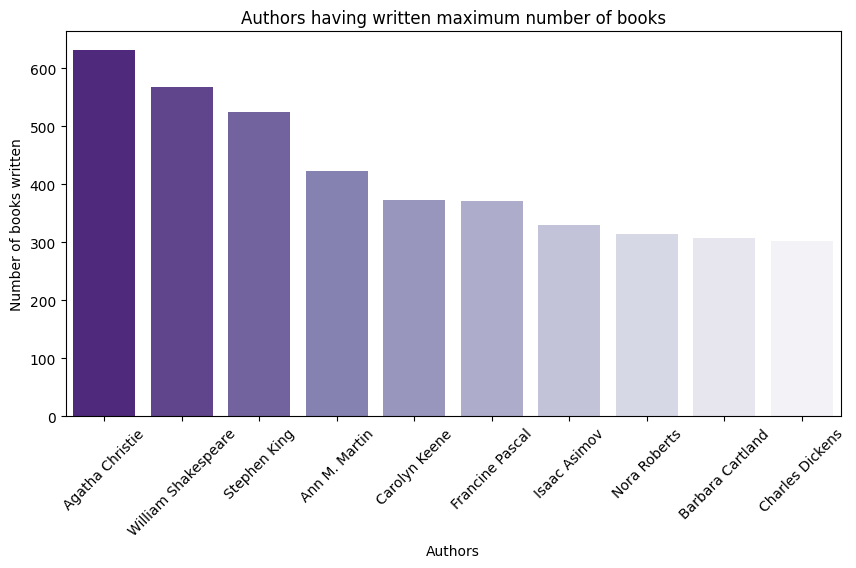

In [75]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x = 'Author', y = 'Count', data = top_authors, palette="Purples_r")

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Authors having written maximum number of books')
figure.set(xlabel='Authors', ylabel='Number of books written')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 authors who have written maximum number of books.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we found  that Agatha Christie have written maximum number of books followed by William Shakespeare and Stephen King.

#### Chart - 2

In [76]:
# Creating a dataframe of years in which maximum number of books were published
top_years = pd.DataFrame(raw_books['Publication Year'].value_counts().head(10)).reset_index()

# Renaming the columns of the dataframe
top_years.rename(columns = {'index':'publication_year', 'Publication Year':'Count'}, inplace=True)

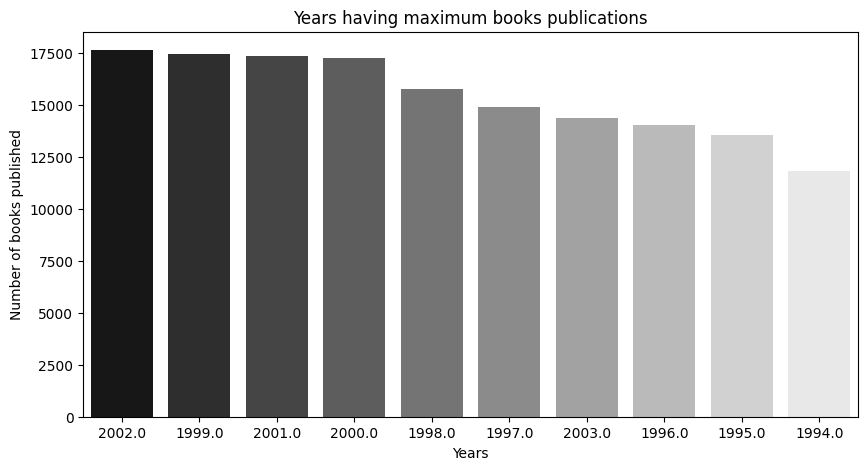

In [77]:
# Chart - 2 visualization code
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='publication_year', y='Count', data=top_years, order=top_years.sort_values('Count', ascending=False).publication_year,palette="gist_gray")

# Defining the title, xticks rotation and x and y labels
figure.set(title='Years having maximum books publications')
figure.set(xlabel='Years', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 years in which maximum number of books were published.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we found that 2002, 2001 and 1999 are the top years in which maximum number of books were published.

#### Chart - 3

In [78]:
# Creating a dataframe of publishers having published maximum number of books
top_publishers = pd.DataFrame(raw_books['Publisher'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_publishers.rename(columns = {'index':'Publisher', 'Publisher':'Count'}, inplace=True)

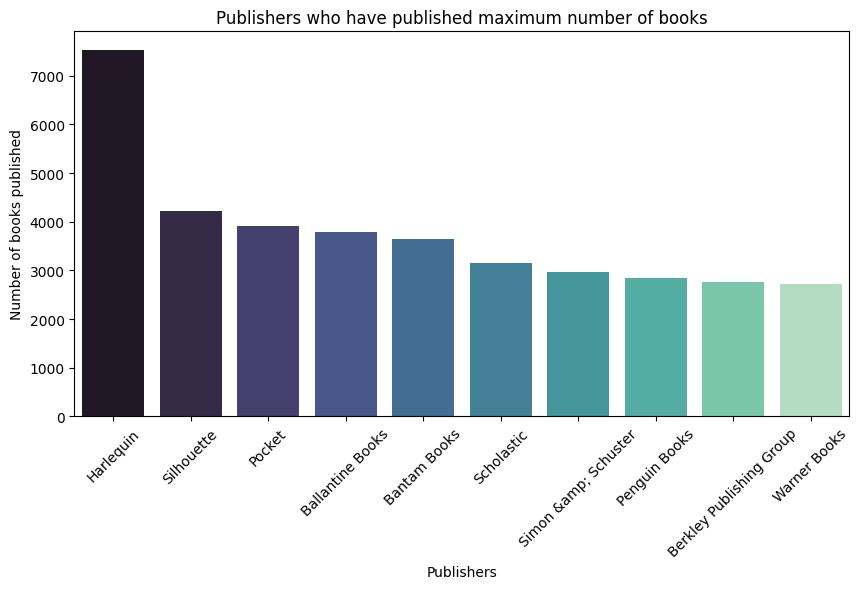

In [79]:
# Chart - 3 visualization code
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='Publisher', y='Count', data=top_publishers,palette="mako")

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Publishers who have published maximum number of books')
figure.set(xlabel='Publishers', ylabel='Number of books published')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 publishers who have published maximum number of books.

##### 2. What is/are the insight(s) found from the chart?

Harlequin published maximum number of books.

#### Chart - 4

In [80]:
# Creating a dataframe of the titles repeated maximum number of times
top_titles = pd.DataFrame(raw_books['Title'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_titles.rename(columns = {'index':'Title', 'Title':'Count'}, inplace = True)

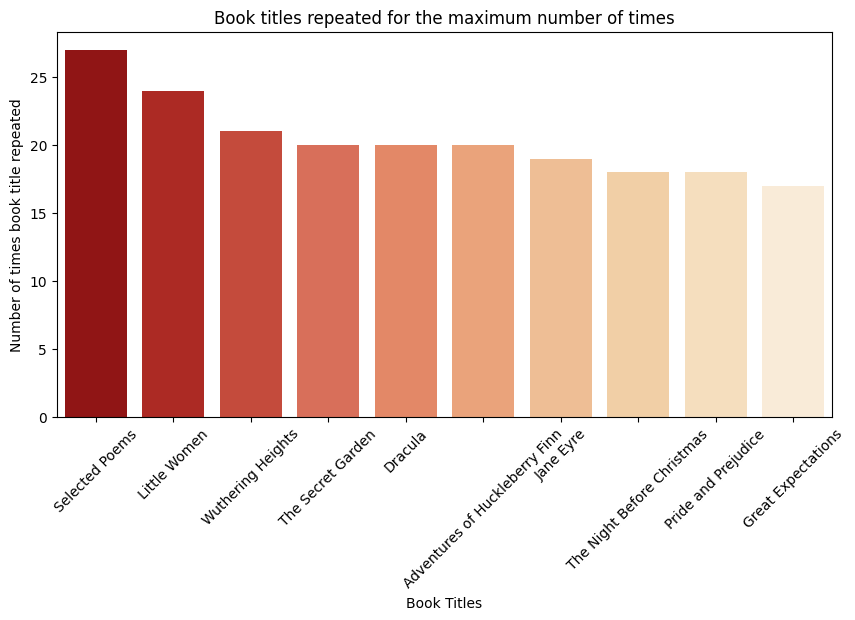

In [81]:
# Chart - 4 visualization code
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x = 'Title', y = 'Count', data = top_titles, palette="OrRd_r")

# Defining the title, xticks rotation and x and y labels
plt.xticks(rotation=45)
figure.set(title='Book titles repeated for the maximum number of times')
figure.set(xlabel='Book Titles', ylabel='Number of times book title repeated')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 titles of the books repeated for maximum number of times

##### 2. What is/are the insight(s) found from the chart?

Selected Poems are the most frequent title of the books.

#### Chart - 5

In [82]:
# Creating a dataframe of the countries where maximum number of users are belogs to
top_countries = pd.DataFrame(raw_users['Country'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_countries.rename(columns = {'index':'Country', 'Country':'Count'}, inplace=True)

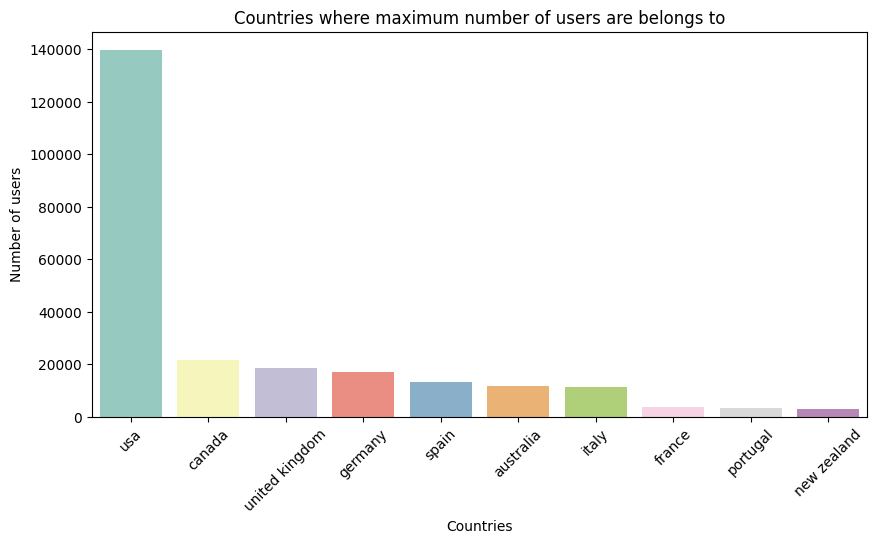

In [83]:
# Chart - 5 visualization code
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='Country', y='Count', data=top_countries, palette="Set3")

# Defining the title and x and y labels
figure.set(title='Countries where maximum number of users are belongs to')
figure.set(xlabel='Countries', ylabel='Number of users')
plt.xticks(rotation=45)

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 countries where maximum number of the users are based from.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of the users are from USA.

#### Chart - 6

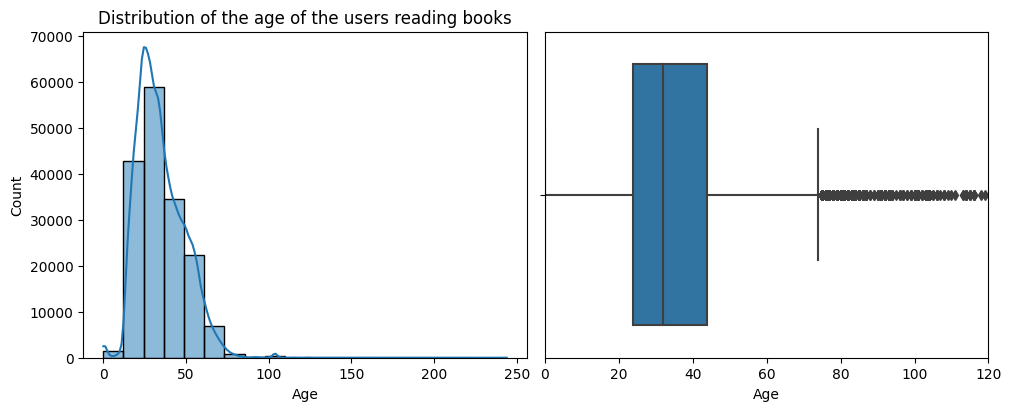

In [84]:
# Chart - 6 visualization code
# Defining the plot size
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(10,4))

# Plotting a distribution plot

figure1 = sns.histplot(data=raw_users['Age'],bins=20,kde=True,ax=axes[0])
# Defining the title and x and y labels
figure1.set(title='Distribution of the age of the users reading books')
figure1.set(xlabel='Age')

# Defining the x-axis data range
plt.xlim(0, 120)

#Plotting a boxplot
sns.boxplot(x='Age',data=raw_users)

# Displaying the graph
plt.show()

##### 1. Why did you pick the specific chart?

To find distribution of the user's age reading books

##### 2. What is/are the insight(s) found from the chart?

Distribution of the user's age is positively skewed and have a lot of outliers, and it seems that user's age are fitted incorrectly in the dataset.

50% of data of user's age lies between 25 to 45.

------------------
------------------

# Rating dataset

#### Chart - 7

In [85]:
# Chart - 7 visualization code
# Creating a dataframe of the users who have given ratings maximum number of times on the books 
top_users = pd.DataFrame(raw_ratings['user_id'].value_counts()[:10]).reset_index()

# Renaming the columns of the dataframe
top_users.rename(columns = {'index':'user_id', 'user_id':'Count'}, inplace=True)

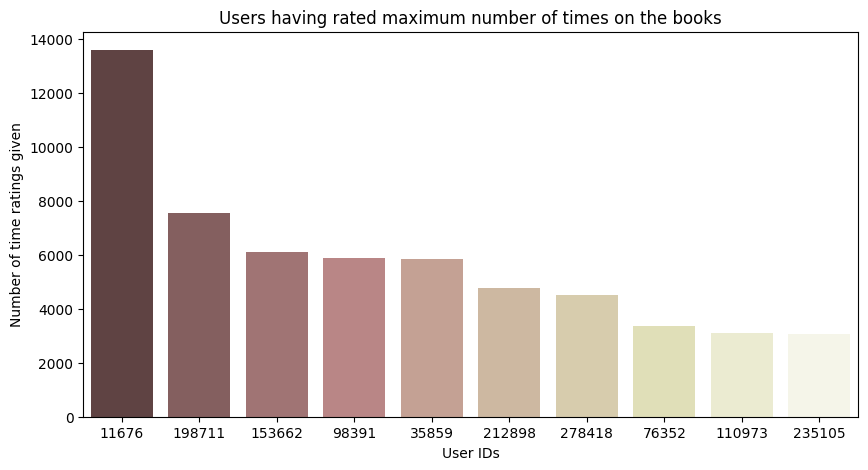

In [86]:
# Defining the plot size
plt.figure(figsize=(10,5))

# Plotting a bargraph
figure = sns.barplot(x='user_id', y='Count', data=top_users, order=top_users.sort_values('Count', ascending=False).user_id, palette="pink")

# Defining the title and x and y labels
figure.set(title='Users having rated maximum number of times on the books')
figure.set(xlabel='User IDs', ylabel='Number of time ratings given')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find top 10 users who have rated maximum number of times on the books

##### 2. What is/are the insight(s) found from the chart?

User with User ID 11676 is the most frequent book rater

#### Chart - 8

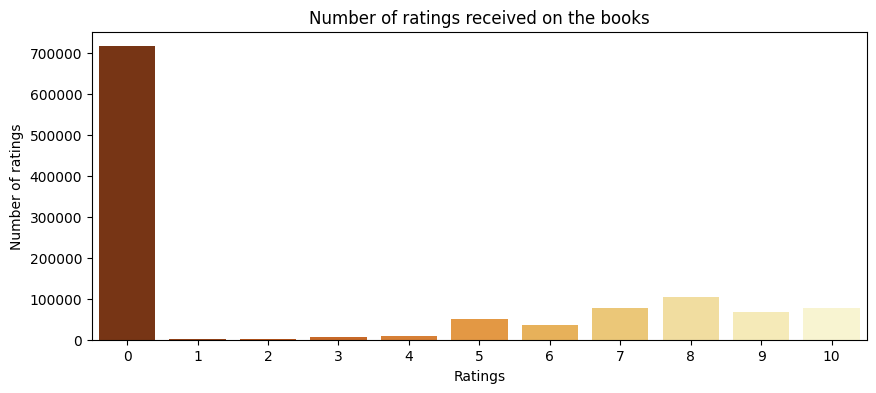

In [87]:
# Chart - 8 visualization code
# Defining the plot size
plt.figure(figsize=(10,4))

# Plotting a bargraph
figure = sns.countplot(x=raw_ratings['Rating'],palette="YlOrBr_r")

# Defining the title and x and y labels
figure.set(title='Number of ratings received on the books')
figure.set(xlabel='Ratings', ylabel='Number of ratings')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To find the distibution of ratings received on the books.



##### 2. What is/are the insight(s) found from the chart?


0 is the most frequent rating received on the book, it is either received 0 rating or no rating by the user.

#### Chart - 9

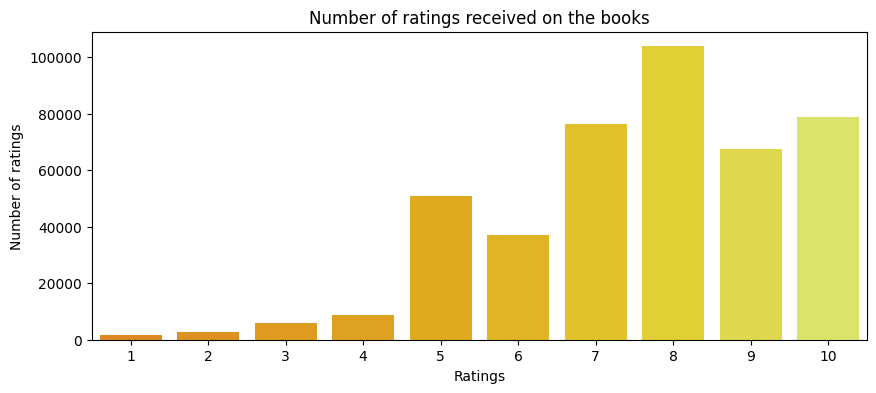

In [88]:
# Creating a dataframe with no 0 ratings
rating = raw_ratings[raw_ratings['Rating']!=0]

# Defining the plot size
plt.figure(figsize=(10,4))

# Plotting a bargraph
figure = sns.countplot(x = rating['Rating'], data=rating, palette="Wistia_r")

# Defining the title and x and y labels
figure.set(title='Number of ratings received on the books')
figure.set(xlabel='Ratings', ylabel='Number of ratings')

# Displaying the graph
plt.show(figure)

##### 1. Why did you pick the specific chart?

To Find the number of different ratings received on the books excluding 0 rating

##### 2. What is/are the insight(s) found from the chart?

After excluding 0 rating, 8 is the most frequent rating received on the books.

#### Chart - 10

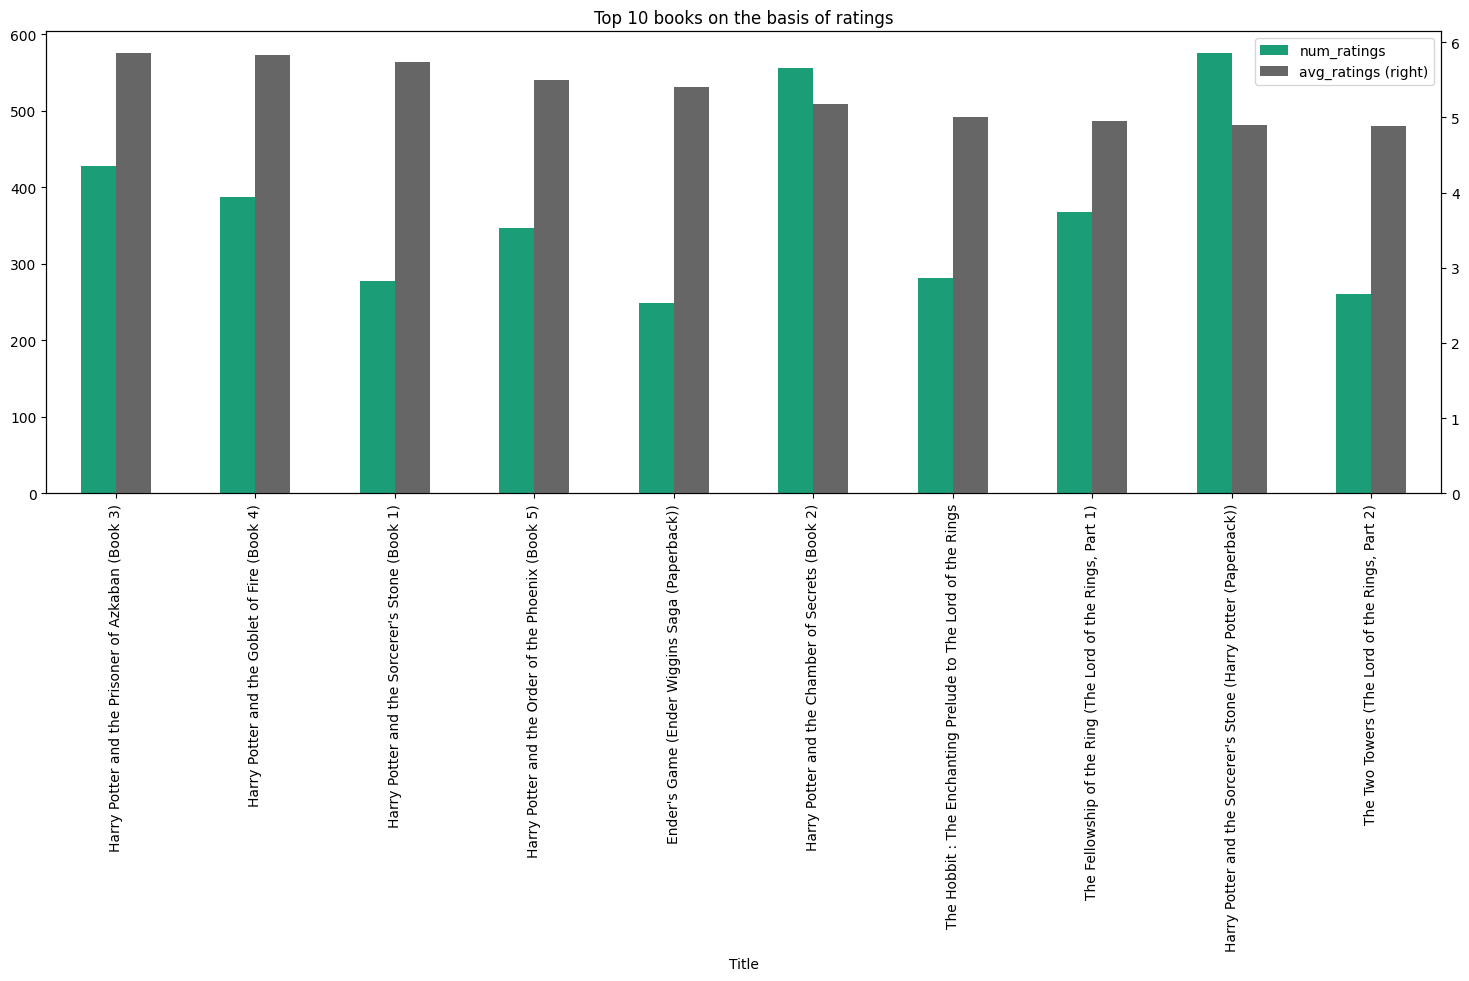

In [89]:
# Chart - 10 visualization code
# Ploting the bargraph of the top 10 most popular books
popular_books_df.plot(x='Title', title='Top 10 books on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(18,6),
                      secondary_y='avg_ratings')
plt.show()

##### 1. Why did you pick the specific chart?

To find the top 10 books on the basis of ratings

##### 2. What is/are the insight(s) found from the chart?

The Book "Harry Potter and the Prisoner of Azkaban(Book 3)" has maximum Average rating and Number of rating are more than 400.

#### Chart - 11

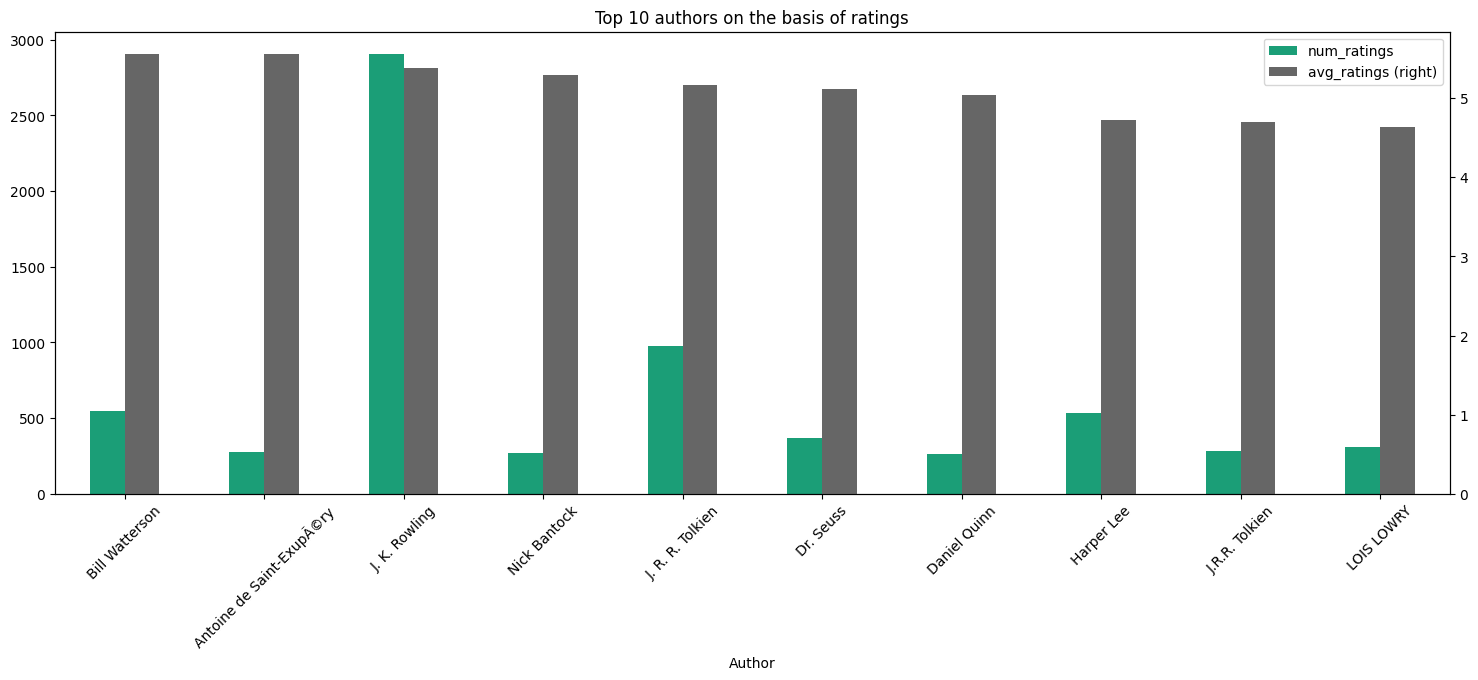

In [90]:
# Chart - 11 visualization code
# Ploting the bargraph of the top 10 most popular authors

popular_authors_df.plot(x='Author', title='Top 10 authors on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(18,6),
                      secondary_y='avg_ratings', rot=45)
plt.show()

##### 1. Why did you pick the specific chart?

To find the top 10 authors on the basis of ratings.

##### 2. What is/are the insight(s) found from the chart?

Author Bill Watterson has maximum average rating.

#### Chart - 12

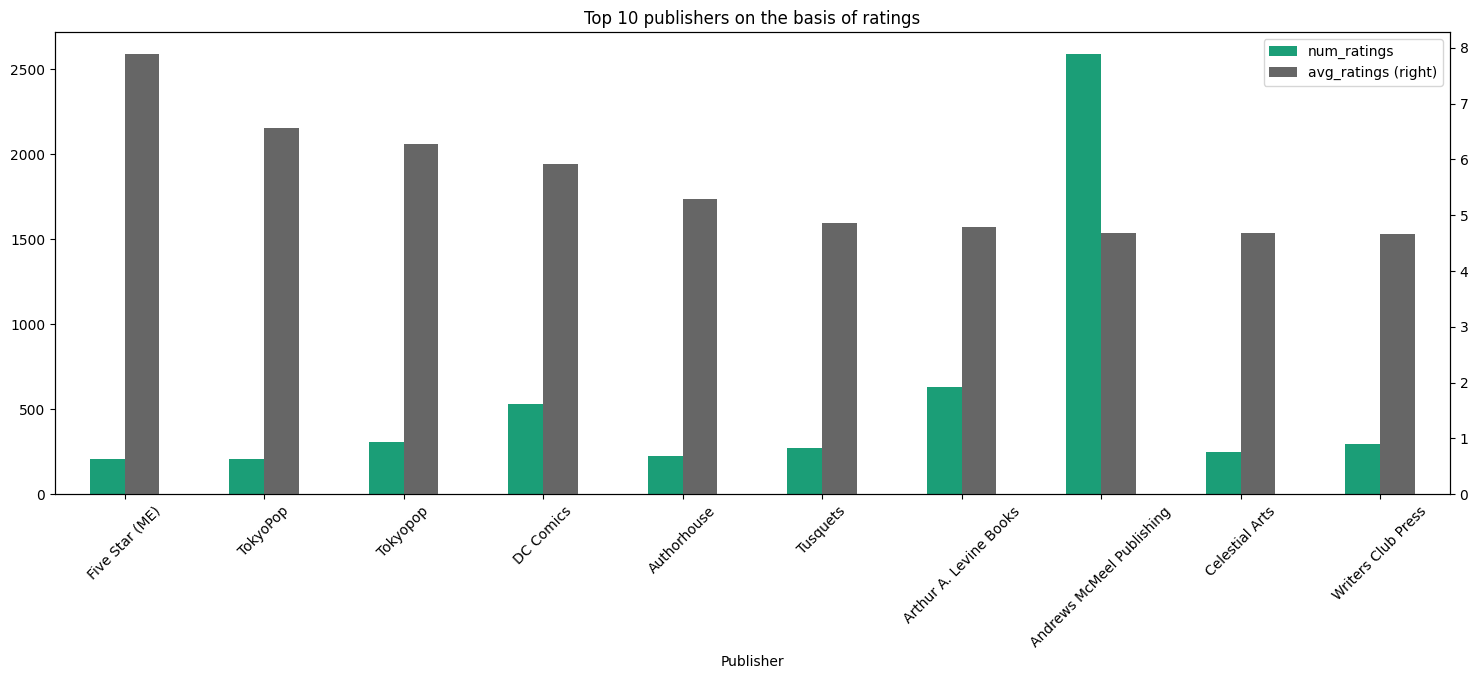

In [91]:
# Chart - 12 visualization code
# Ploting the bargraph of the top 10 most popular publishers

popular_publishers_df.plot(x='Publisher', title='Top 10 publishers on the basis of ratings',
                      legend=True, kind='bar', colormap='Dark2', figsize=(18,6),
                      secondary_y='avg_ratings', rot=45)
plt.show()

##### 1. Why did you pick the specific chart?

To find top 10 publishers on the basis of ratings.

##### 2. What is/are the insight(s) found from the chart?

Five Star (ME) publisher has maximum average rating(approx 8).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1 : Average rating by the user is 7.5

Hypothesis 2 : User's Age is distributed normally.

Hypothesis 3 : Median of production year is 2004.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Average rating by the user is 7.5

Null Hypothesis H0 : ℳ = 7.5 , Mean rating is 7.5

Alternative Hypothesis H1 : ℳ != 7.5 , Mean rating is not 7.5

#### 2. Perform an appropriate statistical test.

In [92]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy import stats 
from scipy.stats import ttest_1samp

#let's take the sample mean and population mean
pop_mean = 3
sample = popular_books_df['num_ratings']
t_stat, p_value = ttest_1samp(sample, pop_mean)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

# criteria for null hypothesis to reject, Take level of significance(alpha) = 0.05
if p_value <= 0.05:
  print("Reject Null Hypothesis")
else :
  print(" Fail to reject Null hypothesis")

T-statistic value:  9.971477398715892
P-Value:  3.6643108645308443e-06
Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We chose t test for one sample (two-tailed test) to check if the average rating given by users is 7.5 or not.

##### Why did you choose the specific statistical test?

The one-sample t-test is a statistical hypothesis test used to determine whether an unknown population mean is different from a specific value, for our dataset unknown population mean is average user rating and specific value is 7.5.

**INFERENCE** : Since p_value obtained is less than level of significance (0.05). Hence we reject the null hypothesis and conclude that avergae rating given by users is not 7.5.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2 : User's Age is distributed normally.

Null Hypothesis H0 : User's Age has Gaussian distribution.

Alternative Hypothesis H1 : User's Age does not have Gaussian distribution.

#### 2. Perform an appropriate statistical test.

In [93]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
sample = raw_users["Age"]
stat, p_value = shapiro(sample)
print('stat=%.3f, p_value=%.3f' % (stat, p_value))
if p_value > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=nan, p_value=1.000
Probably Gaussian


##### Which statistical test have you done to obtain P-Value?

Here I have used Shapiro - Wilk test to check if Distribution of User's Age is distributed normally or not.

##### Why did you choose the specific statistical test?

Shapiro-Wilk Test is the appropriate test for testing the normality of data. it assumes that Observations in each sample are independent and identically distributed (iid).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3 : Median of production year is 2004.

Null hypothesis H0 : Median of production year is 2004.

Alternative hypothesis H1 : Median of production year is not 2004.


#### 2. Perform an appropriate statistical test.

In [94]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy.stats import wilcoxon as wil

sample = np.array(raw_books["Publication Year"].dropna())
med0 = 2004

W, p = wil(sample - med0, correction = False, mode = 'approx')

print("W = %.1f, p-value = %.3f" % (W, p))

W = 1803534.0, p-value = 0.000


##### Which statistical test have you done to obtain P-Value?

We chose one-sample Wilcoxon signed rank test (two-tailed test) to check if the Median of production year is 2004 or not.

##### Why did you choose the specific statistical test?

One sample Wilcoxon Non Parametric Hypothesis Test is a rank-based test and it compares the standard value with a hypothesized median, for our dataset, unknown population median is Median production year and hypothesized median is 2004.

**INFERENCE** : Since p_value obtained is less than level of significance (0.05). Hence we reject the null hypothesis and conclude that median production year is not 2004.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [126]:
# Handling Missing Values & Missing Value Imputation
# fill null values of the age column of users data as age contains outliers so we can use median
raw_users["Age"].fillna(raw_users.Age.median(),inplace=True)

In [127]:
# filling the null values with median values as there are outliers in Publication Year column
raw_books['Publication Year'].fillna(round(raw_books['Publication Year'].median()),inplace=True)

In [128]:
# filling null values for the column Author and Publisher
# as we have only very few null values 1 and 2 only so we act fill those values with other 
raw_books["Author"].fillna("other", inplace = True)  
raw_books["Publisher"].fillna("other", inplace = True)  

#### What all missing value imputation techniques have you used and why did you use those techniques?

Fill the missing values with median since the column contain outilers.

### 2. Handling Outliers

In [129]:
# Handling Outliers & Outlier treatments
Q3,Q1 = np.percentile(raw_users['Age'],[75,25])
#Calculating Inter Quartile Range
IQR = Q3-Q1
#Fixing Boundaries for outliers
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
raw_users["Age"] = np.where(raw_users["Age"] > max, max, raw_users['Age'])
raw_users["Age"] = np.where(raw_users["Age"] < min, min, raw_users['Age'])

<Axes: xlabel='Age'>

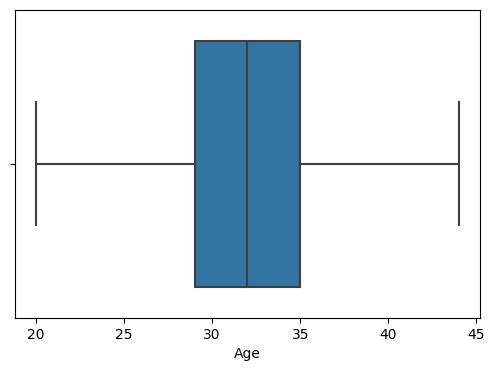

In [130]:
# chceking the outliers again
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=raw_users)

We can conclude that the Outliers has been handeled smoothly and now data don't have any outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used IQR method to fill the right side outliers with maximum value and Left side outliers with the minimum value.

# **7. Popularity Based Approach**

* The main idea behind Popularity Based Approach is to recomend the books which are popular, the popularity can be calculated on the basis of ratings.

In [131]:
def popularity_approach(df,number_of_top_book=50):
    # first we have groupy with Title and Rating as we will recommend popularity on the basis of these columns  
    rating_counts=df.groupby("Title").count()["Rating"].reset_index()
    # counting the number of ratings that particular Title has got
    rating_counts.rename(columns={"Rating":"num_of_ratings"},inplace=True)
    
    # calculating average rating
    rating_avg=df.groupby("Title")["Rating"].mean().reset_index()
    rating_avg.rename(columns={"Rating":"average_rating"},inplace=True)
    
    df_popular_books=rating_counts.merge(rating_avg,on="Title")

    # average rating can be misguiding as they may be baised to number of ratings
    # so taking account of number of ratings for particular book-title
    # therefore  creating a function for calculating meaningfull average rating
    mean_avg_rating=df_popular_books["average_rating"].mean()
    total_ratings=df_popular_books["num_of_ratings"].quantile(0.90)
    def weighted_rate(df):
        number_of_rating_vector=df["num_of_ratings"]
        average_rating_vector=df["average_rating"]
        
        return ((number_of_rating_vector*average_rating_vector) + (total_ratings*mean_avg_rating)) / (number_of_rating_vector+total_ratings)
    
    
    # checking only for books which got more than 100 ratings
    df_popular_books=df_popular_books[df_popular_books["num_of_ratings"] >=100]
    # calculating popularity of books using weighted_rate
    df_popular_books["popularity"]=df_popular_books.apply(weighted_rate,axis=1)
    # sorting the books by its popularity in decending order
    df_popular_books=df_popular_books.sort_values(by="popularity",ascending=False)
    # returning the top n books 
    return df_popular_books[["Title","num_of_ratings","average_rating","popularity"]].reset_index(drop=True).head(number_of_top_book)

In [132]:
# top 20 popular books
top_20=pd.DataFrame(popularity_approach(books_ratings_df,20))
top_20

,Title,num_of_ratings,average_rating,popularity
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,5.805129
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.772160
2,The Little Prince,141,5.815603,5.677236
3,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.667477
4,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,5.449805
5,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639,5.340746
6,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,5.154940
7,The Perks of Being a Wallflower,104,5.144231,5.002081
8,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,4.955663
9,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,4.909949


# **8. Collaborative Filtering Approaches**

In Collaborative Filtering we make predictions of the taste or the interests of the user based on the other similar users behaviour (which is called collaborative) .The simple understanding is that if a person P1 has similar opinion with person P2 , then if person P1 is reading Harry Potter books then person P2 may also read Harry Potter books.

Collaborative Filtering has mainly two implimentaion strategies

* Model Based
* Memory Based

we will use following approaches

* User_based Collaborative Filtering and
* Item_based Collaborative Filtering

Content Based Filtering

Model based Collaborative Filtering Approach

* Singular value decomposition(SVD)
* Non-Negetive Matrix Factorisation(NMF)

# **User Based Collaborative Filtering**

* In this technique we try to predict on basis of what user may like based on the ratings that they had given to the items. In simple words here we try to identify the neighbouring users on the basis of similarity of active users and then scoring of the items is calculated on the basis of those neighbour users.

In [133]:
# Drop users who have given less number of votings 
# we will drop the users where the number of votes are less than 100
new_df=books_ratings_df[books_ratings_df['user_id'].map(books_ratings_df['user_id'].value_counts()) > 100] 

# creating a pivot tables consisting user related information
users_info=new_df.pivot_table(index=["user_id"],columns=["Title"],values="Rating")
users_info.fillna(0,inplace=True)

In [134]:
users_info.head()

Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Always Have Popsicles,Apple Magic (The Collector's series),Beyond IBM: Leadership Marketing and Finance for the 1990s,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),Dark Justice,Deceived,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),Flight of Fancy: American Heiresses (Zebra Ballad Romance),...,Ã?ngeles fugaces (Falling Angels),Ã?Â?. Kolumnen.,Ã?Â?ber das Fernsehen.,Ã?Â?ber die Freiheit.,Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,Ã?Â?berraschung am Valentinstag.,Ã?Â?lpiraten.,Ã?Â?rger mit Produkt X. Roman.,Ã?Â?stlich der Berge.,Ã?Â?thique en toc
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
def choice_of_users(id):
    
    user_favourite=new_df[new_df["user_id"]==id].sort_values(["Rating"],ascending=False)[0:10]
    return user_favourite

def user_based_collaborative(new_df,user_id):
    if user_id not in new_df["user_id"].values:
        print("USER NOT FOUND")
        
        
    else:
        user_index=np.where(users_info.index==user_id)[0][0]
        similar=cosine_similarity(users_info)
        similar_users_list=list(enumerate(similar[user_index]))
        similar_users_list = sorted(similar_users_list,key = lambda x:x[1],reverse=True)[0:10]
    
        record_of_users=[]
    
        for ind in similar_users_list:
                data=books_ratings_df[books_ratings_df["user_id"]==users_info.index[ind[0]]]
                record_of_users.extend(list(data.drop_duplicates("user_id")["user_id"].values))
        
    return record_of_users

def common(df,users_list,user_id):
    temp1=new_df[df["user_id"]==user_id]
    suggested_books=[]
    users_list=list(users_list)
    for id in users_list:
        temp2=df[(df["user_id"]==id)]
        all_books=temp2.loc[~temp2["Title"].isin(temp1["Title"]),:]
        all_books=all_books.sort_values(["Rating"],ascending=False)[0:10]
        suggested_books.extend(all_books["Title"].values)
        
    return suggested_books[0:10]

In [136]:
# taking any random user_id
import random
random_user_id=random.choice(new_df["user_id"].values)
# showing users choice based on history
user_choice=pd.DataFrame(choice_of_users(random_user_id))
# subseting users favourite from users choice
user_favorite=choice_of_users(random_user_id)
n=len(user_choice["Title"].values)
print(f"USER: {random_user_id} ")

USER: 198711 


In [137]:
user_favorite

,ISBN,Title,Author,Publication Year,Publisher,user_id,Rating
837866,0878300481,"Foreign Dialects: A Manual for Actors, Directo...",Marguerite S. Herman,1979.0,Theatre Arts Books,198711,10
761649,0684178869,DEATH OF A LAKE (Scribner Crime Classics),Arthur Upfield,1983.0,Scribner Paper Fiction,198711,9
552988,006101561X,Cat Seeing Double : A Joe Grey Mystery (Joe Gr...,Shirley Rousseau Murphy,2003.0,Avon,198711,9
954508,0553245643,Sundiver (Uplift Trilogy),David Brin,1984.0,Bantam Books,198711,8
352505,0553279718,"The Uplift War (The Uplift Saga, Book 3)",DAVID BRIN,1995.0,Spectra,198711,8
835047,0312966512,The Riddle of St. Leonard's (An Owen Archer My...,Candace Robb,1998.0,St. Martin's Paperbacks,198711,8
552938,0312990014,"Crouching Buzzard, Leaping Loon (A Meg Lanslow...",Donna Andrews,2004.0,St. Martin's Minotaur,198711,8
813686,0886778190,Wizard of the Grove (Daw Book Collectors),Tanya Huff,1999.0,Daw Books,198711,8
772956,0307020371,Walt Disney's 101 Dalmatians: Based on the Boo...,Dodie Smith,1985.0,Random House Childrens Books,198711,8
352528,0553269828,"Sundiver (The Uplift Saga, Book 1)",DAVID BRIN,1985.0,Spectra,198711,8


In [139]:
# getting user based data for particular random user id
user_based=user_based_collaborative(new_df,random_user_id)
# getting recomended books for that particular random user id
book_suggestions_user=common(new_df,user_based,random_user_id)
# ceating a dataframe to store the results
book_suggestions_user=pd.DataFrame(book_suggestions_user,columns=["Title"])
book_suggestions_user

,Title
0,Illusions
1,Perdido Street Station
2,Fountainhead
3,Spell for Chameleon #01
4,"Boogeyman (Star Trek: The Next Generation, No...."
5,Virgin Earth
6,The Legend of Nightfall (Daw Book Collectors)
7,Pebble in the Sky
8,The Plains of Passage (Earth's Children (Paper...
9,Seven Habits Of Highly Effective People


# **Item Based Collaborative Filtering**

* In Item based collaborative filtering we try to find similar items based on the items which user has liked or interacted with .It suggests an item based on items the user has previously consumed. It looks for the items the user has consumed then it finds other items similar to consumed items and recommends accordingly

In [140]:
def item_based_approach(data,querry_bookTitle,number_of_suggesions):
    querry_bookTitle=str(querry_bookTitle)
    
    if querry_bookTitle in data["Title"].values:
        count_rating=pd.DataFrame(data["Title"].value_counts())
        # seperating rare books
        rare=count_rating[count_rating["Title"]<=100].index
        # defining common books 
        # as those books which are not rare are common books
        common_b=data[~data["Title"].isin(rare)]
        
        # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books 
            ran5=pd.Series(common_b["Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            common_b_pivot=common_b.pivot_table(index=["user_id"],columns=["Title"],values="Rating")
            # defining title as t
            t=common_b_pivot[querry_bookTitle]
            # making suggesions based on the correlation
            suggesion_df=pd.DataFrame(common_b_pivot.corrwith(t).sort_values(ascending=False)).reset_index(drop=False)
            
            if querry_bookTitle in [ele for ele in suggesion_df["Title"]]:
                suggesion_df=suggesion_df.drop(suggesion_df[suggesion_df["Title"]==querry_bookTitle].index[0])
                
            less_rating=[]
            for ele in suggesion_df["Title"]:
                if data[data["Title"]==ele]["Rating"].mean() < 5:
                    less_rating.append(ele)
            if suggesion_df.shape[0] - len(less_rating) > 5:
                suggesion_df=suggesion_df[~suggesion_df["Title"].isin(less_rating)]
                
            suggesion_df=suggesion_df[0:number_of_suggesions]
            suggesion_df.columns=["Title","Correlation"]

            return suggesion_df
            
    else:
        print("No Results Found  !!!")

In [141]:
# getting top 10 suggestions from item-based approach
item_based_approach(books_ratings_df,"The Da Vinci Code",10)

,Title,Correlation
40,The Perks of Being a Wallflower,0.477725
127,Ender's Game (Ender Wiggins Saga (Paperback)),0.347085
270,The Hobbit : The Enchanting Prelude to The Lor...,0.228288
276,Harry Potter and the Sorcerer's Stone (Book 1),0.223224
280,Harry Potter and the Chamber of Secrets (Book 2),0.221635
369,Harry Potter and the Goblet of Fire (Book 4),0.169938
379,The Little Prince,0.162574
527,Harry Potter and the Order of the Phoenix (Boo...,0.080607
723,Harry Potter and the Prisoner of Azkaban (Book 3),-0.041449


In [142]:
# when the book title is not present
item_based_approach(books_ratings_df,"machine learning",10)

No Results Found  !!!


# **9. Content based Filtering**

* In Content based Filtering approach we recomend item to the users based on the content we have about the history of users. We recomend similar books based what other books that particular user has read.In simple words based on what we like ,the algorithm will simply pick the items with similar content to recomend us.

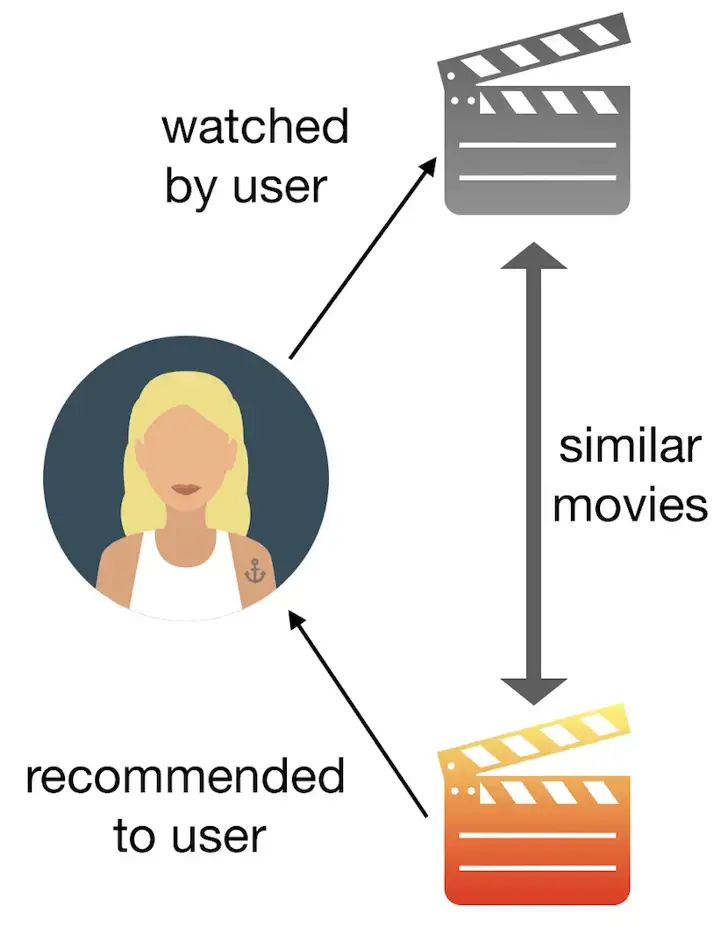

In [143]:
def content_based_approach(data,querry_bookTitle,number_of_books):
    querry_bookTitle=str(querry_bookTitle)
    
    if querry_bookTitle in data["Title"].values:
        count_rating=pd.DataFrame(data["Title"].value_counts())
        # seperating rare books
        rare=count_rating[count_rating["Title"]<=100].index
        # defining common books 
        # as those books which are not rare are common books
        common_b=data[~data["Title"].isin(rare)]
        
        # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books 
            ran5=pd.Series(common_b["Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            #first we drop the dulplicates Book Title
            common_b=common_b.drop_duplicates(subset=["Title"])
            common_b.reset_index(inplace=True)
            # setting the index to length of unique common books
            common_b["index"]=[ele for ele in range(common_b.shape[0])]
            # taking content based title , Author and publisher
            list_of_targets=["Title","Author","Publisher"]
            common_b["all_features"] = [" ".join(common_b[list_of_targets].iloc[ele,].values) for ele in range(common_b[list_of_targets].shape[0])]
            # transforming into vectorized form
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_b["all_features"])
            # finding similarity based on title , Author and publisher
            similar=cosine_similarity(common_booksVector)
            index=common_b[common_b["Title"]==querry_bookTitle]["index"].values[0]
            similar_books_list=list(enumerate(similar[index]))
            similar_books_sorted=sorted(similar_books_list,key=lambda ele:ele[1],reverse=True)[1:number_of_books+1]
            suggested_books=[]
            for ele in range(len(similar_books_sorted)):
                
                suggested_books.append(common_b[common_b["index"]==similar_books_sorted[ele][0]]["Title"].item())
            return suggested_books
    else:
        print(" COULD NOT FIND THE CONTENT") 

In [144]:
content_based_approach(books_ratings_df,'The Da Vinci Code',10)

['The Catcher in the Rye',
 'The Brethren',
 'Deception Point',
 'The Alibi',
 'The Firm',
 'The Client',
 'The Chamber',
 'The Partner',
 'The Last Juror',
 'The Curious Incident of the Dog in the Night-Time (Today Show Book Club #13)']

# **10. Model Based Approach**

**Singular Value Decomposition (SVD)**, is a popular method in field of Data Science and Machine Learning .It is a classical method from the Linear Algebra concept. It is popular beacuse of its properties and its use in Recomendation System. We can use this in recomending Books, movies etc.

SVD is a method from linear algebra that has been generally used as a dimensionality reduction technique in ML problems. It is a matrix Factorisation technique which tries to reduce the number of feature or attributes by reducing the sapce dimension from N dimension to I dimension.SVD is used as a collaborative filtering technique in recomendation technique domain. It consist of a matrix structure where the rows define the users and columns defines the item.

**Non- Negetive Matrix Factorisation(NMF)** : Our goal in NMF is to approximate the users-item V matrix by the dot product of two arrays W and H. Dimensions of the arrays are defined by dimensions of V and number of components we set to the algorithm. If V has n rows and m columns and we want to decompose it to k components, then W has n rows, and k columns and H has k rows and m columns.This is actually matrix factorization part of the algorithm. The Non-negative part refers to V, W, and H — all the values have to be equal or greater than zero, i.e., non-negative.

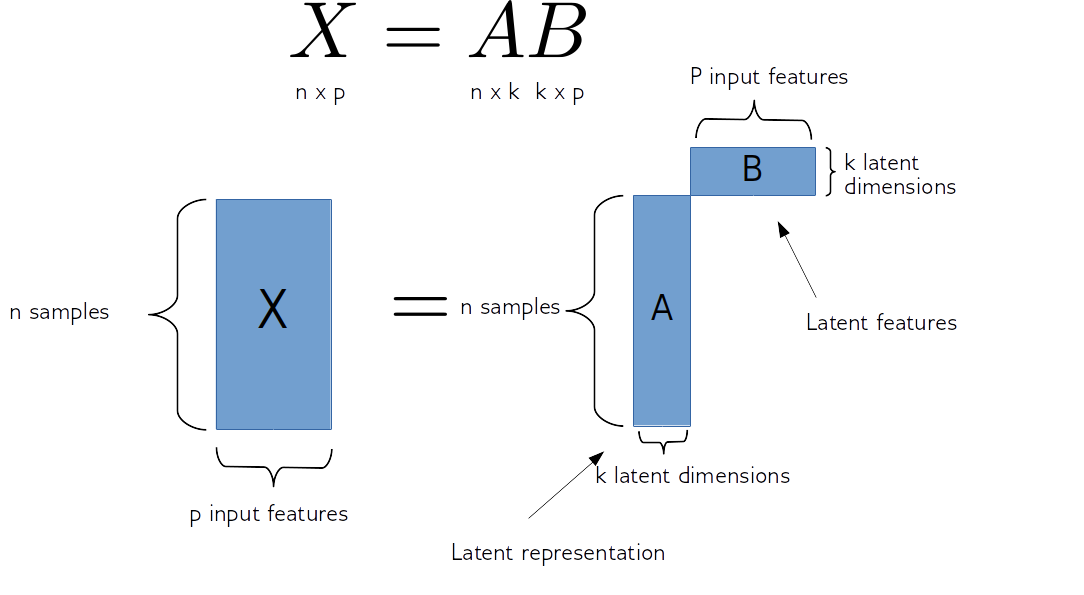

# **11. ML Model Implementation**

In [145]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095475 sha256=09956c81de5ad024f4fdeb6cdd12a2ea4a6df9024cc3d09fd102160ccb2cc7be
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [146]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [147]:
# considering valid ratings only
raw_ratings=raw_ratings[raw_ratings['Rating'] != 0]
df_merge=pd.merge(raw_users, raw_ratings, on="user_id")
df_merge=pd.merge(df_merge,raw_books, on="ISBN")

In [148]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           383842 non-null  int64  
 1   Location          383842 non-null  object 
 2   Age               383842 non-null  float64
 3   Country           383842 non-null  object 
 4   ISBN              383842 non-null  object 
 5   Rating            383842 non-null  int64  
 6   Title             383842 non-null  object 
 7   Author            383842 non-null  object 
 8   Publication Year  383842 non-null  float64
 9   Publisher         383842 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.2+ MB


In [149]:
df_merge.isnull().sum()

user_id             0
Location            0
Age                 0
Country             0
ISBN                0
Rating              0
Title               0
Author              0
Publication Year    0
Publisher           0
dtype: int64

# ML Model - 1

In [150]:
# ML Model - 1 Implementation
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_merge[['user_id', 'ISBN', 'Rating']], reader)
# Fit the Algorithm
svd_default = SVD()
results_svd = cross_validate(svd_default, data, cv=3)
pd.DataFrame(results_svd).mean()
# Predict on the model

test_rmse    1.642592
test_mae     1.269475
fit_time     9.879525
test_time    1.942196
dtype: float64

In [151]:
#implimentation of NMF
nmf = NMF()
results_nmf = cross_validate(nmf, data, cv=3)
pd.DataFrame(results_nmf).mean()

test_rmse     2.475658
test_mae      2.056885
fit_time     27.507490
test_time     1.133418
dtype: float64

# 2. Cross- Validation & Hyperparameter Tuning

* As SVD model is working good with default parameters so, we would try hypertunning on SVD model only.

Hyperparameter tunning is a process where we tune our model that is we try to find the model parameters which would give best results

* Here we have use GridSearchCV which check the results for all possible combination from the parameter grid

* we will try to find the model parameters

      'n_factors'- number of factors
      'n_epochs'- number of epochs i.e number of iteration of the SVD procedure 
      'lr_all'- learning rate
      'reg_all- the regularisation term for all parameters

In [152]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_factors': [60,50],
              'n_epochs': [6, 16],
              'lr_all': [0.01, 0.001],
              'reg_all': [0.1, 0.9]}

opt_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
opt_svd.fit(data)

print(opt_svd.best_score['rmse'])
print(opt_svd.best_params['rmse'])

1.6336239572947877
{'n_factors': 50, 'n_epochs': 16, 'lr_all': 0.01, 'reg_all': 0.1}


**Hyperparameter tunning for SVD model**

In [153]:
# Spliting the dataset in train teat and predict
train, test = train_test_split(data, test_size=0.2)
best_params=opt_svd.best_params['rmse']
optimized_svd = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
optimized_svd.fit(train)
pred = optimized_svd.test(test)

In [154]:
results_svd = cross_validate(optimized_svd, data, cv=3)
pd.DataFrame(results_svd).mean()

test_rmse    1.633135
test_mae     1.263884
fit_time     4.848091
test_time    1.570074
dtype: float64

In [155]:
# To see predictions
df_pred = pd.DataFrame(pred, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(10)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
16816,242458,0553250531,9.0,8.649619,False,9.0,0.350381
75035,266226,0590423541,9.0,8.211759,False,8.0,0.788241
59951,22994,0345404769,7.0,7.544287,False,8.0,0.544287
23673,274111,0393063852,10.0,8.411834,False,8.0,1.588166
40546,150498,1882138481,10.0,8.864179,False,9.0,1.135821
70580,250234,0515117234,5.0,7.441852,False,7.0,2.441852
21174,11676,1588454770,8.0,7.353172,False,7.0,0.646828
17868,76483,0425129551,2.0,7.722961,False,8.0,5.722961
11835,27617,0882436120,10.0,8.242657,False,8.0,1.757343
67614,4017,0385317042,10.0,8.739451,False,9.0,1.260549


Which hyperparameter optimization technique have you used and why?

* GridSearchCV , As we have to check results for all possible combination of parameters from the param grid.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* yes , the test_rmse has been reduced by 0.01.

# **Conclusion**

**For EDA part**

* Top-10 most rated books were essentially novels. Books like The Lovely Bone and Wild Animus were very famous.

* 2002, 2001 and 1999 are the top years in which maximum number of books were published.

* Maximum number of the users are from USA.

* 50% of data of user's age lies between 25 yr to 45 yr.

* Most of the books were published by Hariequin, Silhouette and Pocket.

* As per this dataset, Stephen King is the Author who got maximum number of ratings by the users.

* Based on this dataset Agatha Christie released maximums books .Followed by William Shakespeare and Stephen King are 2nd and 3rd most Authors who have relased maximum books.

* Most common rating given by the user is 8 except 0.

**Modelling part**

* SVD model works better than NMF model as it has lower RMSE and MAE score.

# ***Hurrah! You have successfully completed my Machine Learning Capstone Project !!!***